# 1. Importing Libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set(rc={'figure.figsize':(15,10)})

In [81]:
import warnings
warnings.filterwarnings('ignore')

# 2. Data Sourcing

In [82]:
raw_data = pd.read_csv('train.csv')

In [83]:
raw_data.shape

(1460, 81)

In [84]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [85]:
raw_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Dropping Id Column as pandas will automatically assign Id to each row

In [86]:
raw_data = raw_data.drop(columns=['Id'])

# 3. Pre-Defined Graph Functions

#### Bar Plot

In [87]:
def plot_bar_graph_from_series(data, plot_title, x_axis_label, y_axis_label, x_axis_label_rotation=0, y_axis_label_rotation=0, data_label_rotation='vertical'):
    graph = sns.barplot(x=data.index, y=data.values)
    plt.title(plot_title, fontdict={'fontsize': 20})
    plt.xlabel(x_axis_label, fontdict={'fontsize': 15})
    plt.ylabel(y_axis_label, fontdict={'fontsize': 15})
    graph.set_xticklabels(graph.get_xticklabels(), rotation=x_axis_label_rotation)
    graph.set_yticklabels(graph.get_yticklabels(), rotation=y_axis_label_rotation)
    label_deviation_above_y_axis = data.max() * 0.015
    for index, value in enumerate(data.iteritems()):
        graph.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation=data_label_rotation)
    plt.show()

#### Box Plot

In [88]:
def plot_box_plot_from_series(data, plot_title, x_axis_label):
    plt.figure(figsize=(15, 5))
    sns.boxplot(data)
    plt.title(plot_title, fontdict={'fontsize': 20})
    plt.xlabel(x_axis_label, fontdict={'fontsize': 15})
    plt.show()

# 4. Data Cleaning

In [89]:
raw_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 4.1 Dwelling Type (MSSubClass)

#### Identifying Null Values 

In [90]:
raw_data.MSSubClass.isna().sum()

0

In [91]:
ms_sub_df = raw_data.MSSubClass.value_counts(sort=False)
ms_sub_df

20     536
30      69
40       4
45      12
50     144
60     299
70      60
75      16
80      58
85      20
90      52
120     87
160     63
180     10
190     30
Name: MSSubClass, dtype: int64

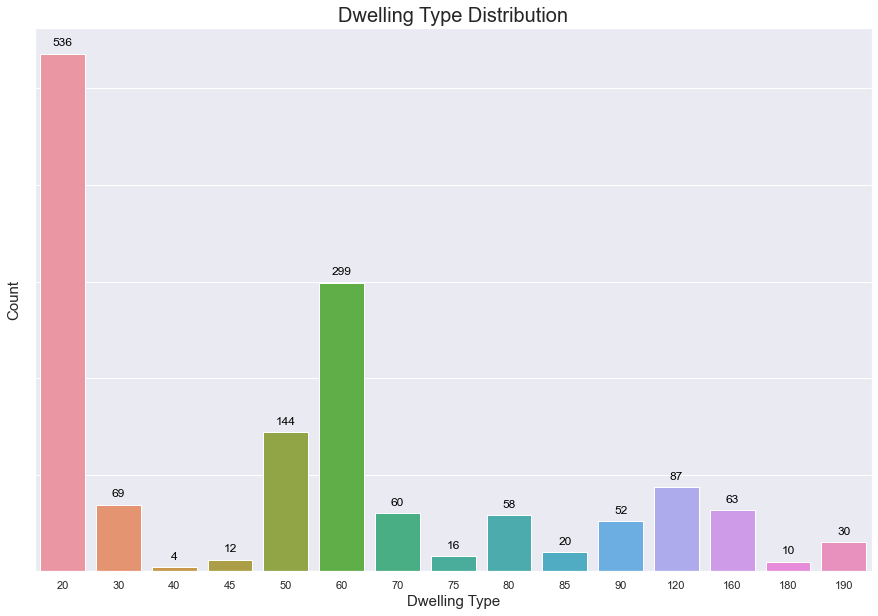

In [92]:
plot_bar_graph_from_series(data=ms_sub_df, plot_title='Dwelling Type Distribution', x_axis_label='Dwelling Type',
                           y_axis_label='Count', data_label_rotation='horizontal')

#### In the above feature, we can conclude that Dwelling type Number corresponds to a numerical variable. So we can leave it as it is.
#### This is evident from the fact that, as the number increases (from 20 to 190) dwelling type improves. So we will leave this input as it is.

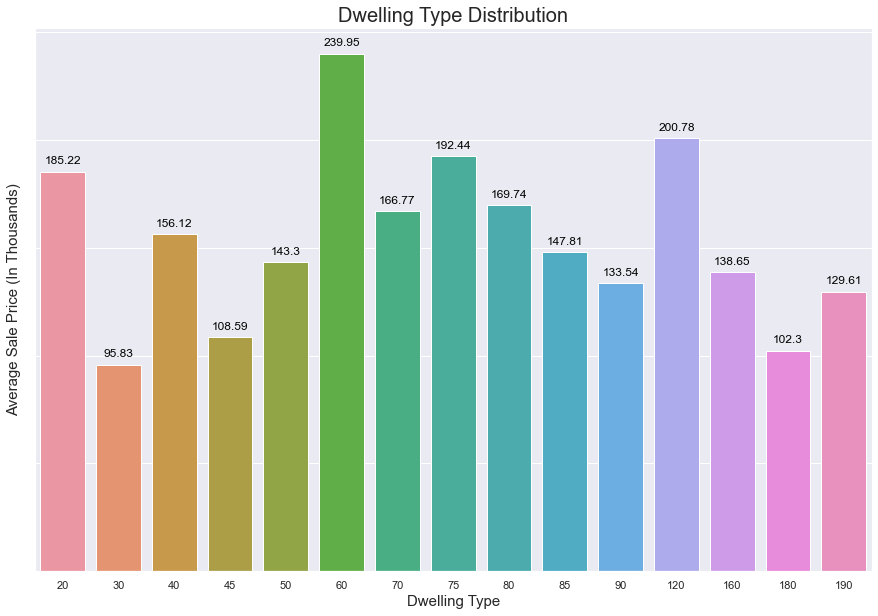

In [93]:
plot_bar_graph_from_series(data=raw_data.groupby(by='MSSubClass').SalePrice.mean() / 1000,
                           plot_title='Dwelling Type Distribution', x_axis_label='Dwelling Type',
                           y_axis_label='Average Sale Price (In Thousands)', data_label_rotation='horizontal')

### 4.2 Zone Classification

In [94]:
raw_data.MSZoning.isna().sum()

0

In [95]:
ms_zone_df = raw_data.MSZoning.value_counts(sort=False)
ms_zone_df

C (all)      10
RM          218
RH           16
RL         1151
FV           65
Name: MSZoning, dtype: int64

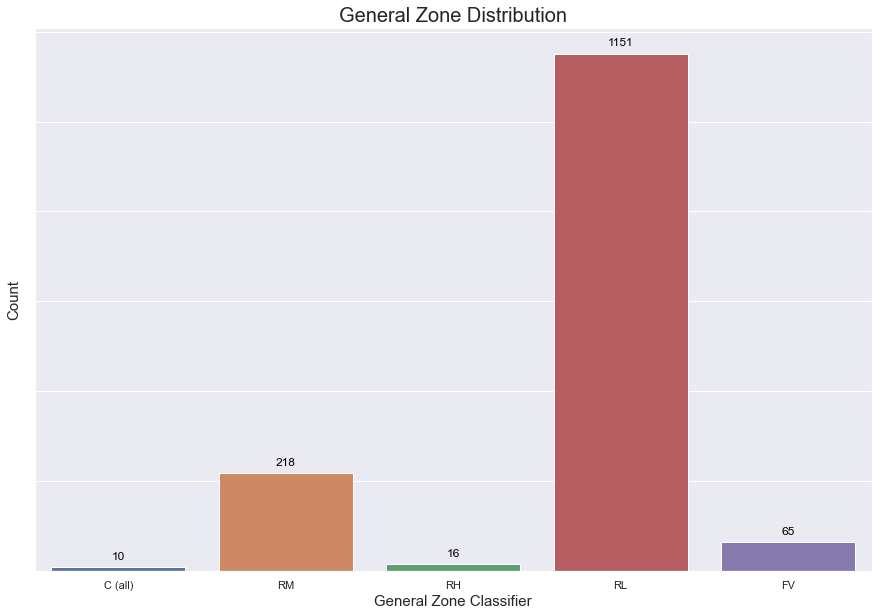

In [96]:
plot_bar_graph_from_series(data=ms_zone_df, plot_title='General Zone Distribution', x_axis_label='General Zone Classifier',
                           y_axis_label='Count', data_label_rotation='horizontal')

#### Zone Classification Varibale do not hold any order. So, this variable can be used as Categorical Nominal Variable

### 3.3 Lot Frontage

In [97]:
raw_data.LotFrontage.isna().sum()

259

#### Lot Frontage mainly refers to Linear Feet of the Street connected to property.
#### In few cases, we come across scenarios wherein the Lot Frontage is 0 i.e. street is not connected.
#### So for this variable, we will continue marking the missing values i.e. NA with 0

In [98]:
raw_data.LotFrontage = raw_data.LotFrontage.replace([np.nan], 0)

In [99]:
raw_data.LotFrontage.isna().sum()

0

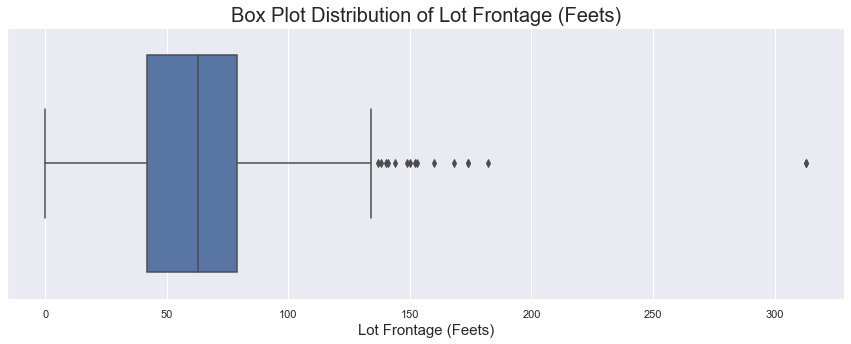

In [100]:
plot_box_plot_from_series(data=raw_data.LotFrontage,
                          plot_title='Box Plot Distribution of Lot Frontage (Feets)', 
                          x_axis_label='Lot Frontage (Feets)')

### 3.4 Lot Area (================> Remaining <================)

In [101]:
raw_data.LotArea.isna().sum()

0

In [102]:
raw_data.LotArea.describe(percentiles=np.arange(0, 1.1, 0.1))

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
0%         1300.000000
10%        5000.000000
20%        7078.400000
30%        8063.700000
40%        8793.400000
50%        9478.500000
60%       10198.200000
70%       11066.500000
80%       12205.800000
90%       14381.700000
100%     215245.000000
max      215245.000000
Name: LotArea, dtype: float64

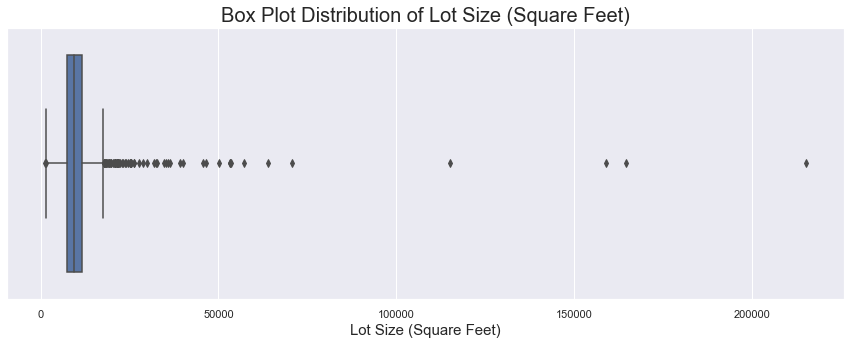

In [103]:
plot_box_plot_from_series(data=raw_data.LotArea,
                          plot_title='Box Plot Distribution of Lot Size (Square Feet)', 
                          x_axis_label='Lot Size (Square Feet)')

#### Above graph certainly shows that there are few outliers which needs to be handled

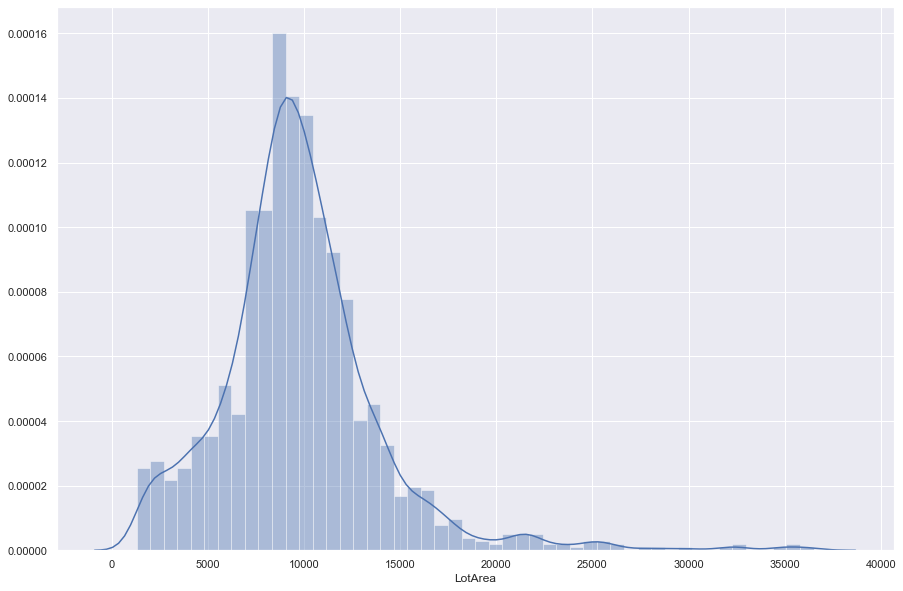

In [104]:
sns.distplot(raw_data[raw_data.LotArea < raw_data.LotArea.quantile(0.99)].LotArea)
plt.show()

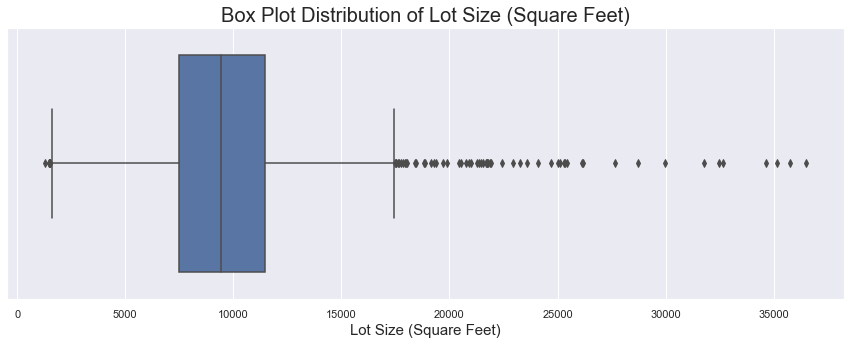

In [105]:
plot_box_plot_from_series(data=raw_data.LotArea[raw_data.LotArea < raw_data.LotArea.quantile(0.99)],
                          plot_title='Box Plot Distribution of Lot Size (Square Feet)', 
                          x_axis_label='Lot Size (Square Feet)')

### 3.5 Street

In [106]:
raw_data.Street.isna().sum()

0

In [107]:
street_df = raw_data.Street.value_counts(sort=False)
street_df

Pave    1454
Grvl       6
Name: Street, dtype: int64

#### Usually Gravel Streets are cheaper as compared to Well Paved Streets. So we will impute the values accordingly for better reference

In [108]:
raw_data.Street = raw_data.Street.map({'Grvl': 0, 'Pave': 1})

In [109]:
raw_data.Street.value_counts(sort=False)

0       6
1    1454
Name: Street, dtype: int64

### 3.6 Alley

In [110]:
raw_data.Alley.isna().sum()

1369

In [111]:
alley_df = raw_data.Alley.value_counts(sort=False)
alley_df

Pave    41
Grvl    50
Name: Alley, dtype: int64

#### In this column, null values corresponds to No Alley Access and out of 2 other values, Gravel is usually cheaper than Paved one. So we will impute the values as
- 0: No Alley access
- 1: Gravel
- 2: Paved

In [112]:
raw_data.Alley = raw_data.Alley.map({np.nan: 0, 'Grvl': 1, 'Pave': 2})

In [113]:
raw_data.Alley.value_counts(sort=False)

0    1369
1      50
2      41
Name: Alley, dtype: int64

In [77]:
#### More than 90% of value are missing. We shall be dropping this column.
# round(raw_data.Alley.isna().sum() / len(raw_data.Alley) * 100, 2)
# raw_data = raw_data.drop(columns=['Alley'])

### 3.7 Lot Shape

In [114]:
lot_shape_df = raw_data.LotShape.value_counts(sort=False)
lot_shape_df

IR2     41
IR3     10
IR1    484
Reg    925
Name: LotShape, dtype: int64

#### Being a categorical ordinal variable, following values will be imputed

In [115]:
raw_data.LotShape = raw_data.LotShape.map({'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3})

In [117]:
raw_data.LotShape.value_counts(sort=False)

0     10
1     41
2    484
3    925
Name: LotShape, dtype: int64

### 3.8 Land Contour

In [118]:
land_cont_df = raw_data.LandContour.value_counts(sort=False)
land_cont_df

Lvl    1311
Bnk      63
Low      36
HLS      50
Name: LandContour, dtype: int64

#### Being a categorical ordinal variable, following values will be imputed

In [119]:
raw_data.LandContour = raw_data.LandContour.map({'Low': 0, 'HLS': 1, 'Bnk': 2, 'Lvl': 3})

In [120]:
raw_data.LandContour.value_counts(sort=False)

0      36
1      50
2      63
3    1311
Name: LandContour, dtype: int64

### 3.9 Utiltities

In [121]:
utility_df = raw_data.Utilities.value_counts(sort=False)
utility_df

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

#### Being a categorical ordinal variable, following values will be imputed

In [122]:
raw_data.Utilities = raw_data.Utilities.map({'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3})

In [123]:
raw_data.Utilities.value_counts(sort=False)

1       1
3    1459
Name: Utilities, dtype: int64

### 3.10 Lot Configuration

In [254]:
lot_config_df = raw_data.LotConfig.value_counts(sort=False)
lot_config_df

Inside     1052
FR2          47
FR3           4
CulDSac      94
Corner      263
Name: LotConfig, dtype: int64

#### Lot Configuration varibale do not hold any order. So, this variable can be used as Categorical Nominal Variable

### 3.11 Land Slope

In [255]:
land_slope_df = raw_data.LandSlope.value_counts(sort=False)
land_slope_df

Sev      13
Gtl    1382
Mod      65
Name: LandSlope, dtype: int64

In [256]:
raw_data.LandSlope = raw_data.LandSlope.map({'Sev': 0, 'Mod': 1, 'Gtl': 2})

In [257]:
raw_data.LandSlope.value_counts(sort=False)

0      13
1      65
2    1382
Name: LandSlope, dtype: int64

### 3.12 Neighbourhood

In [258]:
neighbourhood_df = raw_data.Neighborhood.value_counts(sort=False)
neighbourhood_df

Sawyer      74
StoneBr     25
CollgCr    150
SawyerW     59
SWISU       25
Somerst     86
ClearCr     28
IDOTRR      37
NridgHt     77
MeadowV     17
Blueste      2
Edwards    100
OldTown    113
NoRidge     41
Blmngtn     17
NPkVill      9
Mitchel     49
Gilbert     79
Veenker     11
Crawfor     51
NWAmes      73
BrkSide     58
Timber      38
BrDale      16
NAmes      225
Name: Neighborhood, dtype: int64

### 3.13 Condition 1

In [259]:
raw_data.Condition1.isna().sum()

0

In [260]:
condition_1_df = raw_data.Condition1.value_counts(sort=False)
condition_1_df

Norm      1260
PosN        19
RRAe        11
PosA         8
RRNn         5
Artery      48
Feedr       81
RRNe         2
RRAn        26
Name: Condition1, dtype: int64

### 3.14 Condition 2

In [261]:
raw_data.Condition2.isna().sum()

0

In [262]:
condition_2_df = raw_data.Condition2.value_counts(sort=False)
condition_2_df

Norm      1445
PosN         2
RRAe         1
PosA         1
RRNn         2
Artery       2
Feedr        6
RRAn         1
Name: Condition2, dtype: int64

### 3.15 Building Type

In [263]:
raw_data.BldgType.isna().sum()

0

In [264]:
building_type_df = raw_data.BldgType.value_counts(sort=False)
building_type_df

2fmCon      31
Twnhs       43
1Fam      1220
TwnhsE     114
Duplex      52
Name: BldgType, dtype: int64

### 3.16 House Style

In [265]:
raw_data.HouseStyle.isna().sum()

0

In [266]:
housing_style_df = raw_data.HouseStyle.value_counts(sort=False)
housing_style_df

1Story    726
2.5Fin      8
SLvl       65
1.5Fin    154
2Story    445
SFoyer     37
1.5Unf     14
2.5Unf     11
Name: HouseStyle, dtype: int64

### 3.17 Overall Quality

In [267]:
raw_data.OverallQual.isna().sum()

0

In [268]:
overall_quality_df = raw_data.OverallQual.value_counts(sort=False)
overall_quality_df

1       2
2       3
3      20
4     116
5     397
6     374
7     319
8     168
9      43
10     18
Name: OverallQual, dtype: int64

### 3.18 Overall Condition

In [269]:
raw_data.OverallCond.isna().sum()

0

In [270]:
overall_cond_df = raw_data.OverallCond.value_counts(sort=False)
overall_cond_df

1      1
2      5
3     25
4     57
5    821
6    252
7    205
8     72
9     22
Name: OverallCond, dtype: int64

### 3.19 Year Built

In [271]:
raw_data.YearBuilt.isna().sum()

0

In [272]:
year_df = raw_data.YearBuilt.value_counts(sort=False)
year_df

1872     1
1875     1
1880     4
1882     1
1885     2
        ..
2006    67
2007    49
2008    23
2009    18
2010     1
Name: YearBuilt, Length: 112, dtype: int64

### 3.20 Remodel Year

In [273]:
raw_data.YearRemodAdd.isna().sum()

0

In [274]:
remodel_year_df = raw_data.YearRemodAdd.value_counts(sort=False)
remodel_year_df

1950    178
1951      4
1952      5
1953     10
1954     14
       ... 
2006     97
2007     76
2008     40
2009     23
2010      6
Name: YearRemodAdd, Length: 61, dtype: int64

### 3.21 Roof Style

In [275]:
raw_data.RoofStyle.isna().sum()

0

In [276]:
roof_style_df = raw_data.RoofStyle.value_counts(sort=False)
roof_style_df

Gable      1141
Shed          2
Flat         13
Hip         286
Mansard       7
Gambrel      11
Name: RoofStyle, dtype: int64

### 3.22 Roof Material

In [277]:
raw_data.RoofMatl.isna().sum()

0

In [278]:
roof_mat_df = raw_data.RoofMatl.value_counts(sort=False)
roof_mat_df

WdShake       5
CompShg    1434
ClyTile       1
Metal         1
Tar&Grv      11
WdShngl       6
Membran       1
Roll          1
Name: RoofMatl, dtype: int64

### 3.23 Exterior covering on house (Exterior1st)

In [279]:
raw_data.Exterior1st.isna().sum()

0

In [280]:
ext1_df = raw_data.Exterior1st.value_counts(sort=False)
ext1_df

VinylSd    515
Stone        2
HdBoard    222
Plywood    108
MetalSd    220
Stucco      25
CemntBd     61
BrkComm      2
CBlock       1
ImStucc      1
WdShing     26
BrkFace     50
AsphShn      1
Wd Sdng    206
AsbShng     20
Name: Exterior1st, dtype: int64

### 3.24 Exterior covering on house - If more tahn 1 Material (Exterior2nd)

In [281]:
raw_data.Exterior2nd.isna().sum()

0

In [282]:
ext2_df = raw_data.Exterior2nd.value_counts(sort=False)
ext2_df

CmentBd     60
VinylSd    504
Stone        5
HdBoard    207
Plywood    142
Wd Shng     38
MetalSd    214
Stucco      26
Other        1
Brk Cmn      7
CBlock       1
ImStucc     10
BrkFace     25
AsphShn      3
Wd Sdng    197
AsbShng     20
Name: Exterior2nd, dtype: int64

### 3.25 Masonry veneer type (MasVnrType)

In [283]:
raw_data.MasVnrType.isna().sum()

8

In [284]:
mas_vnr_type_df = raw_data.MasVnrType.value_counts(sort=False)
mas_vnr_type_df

Stone      128
None       864
BrkCmn      15
BrkFace    445
Name: MasVnrType, dtype: int64

### 3.26 Masonry veneer area

In [285]:
raw_data.MasVnrArea.isna().sum()

8

In [286]:
mas_ven_df = raw_data.MasVnrArea.value_counts(sort=False)
mas_ven_df

196.0      4
0.0      861
186.0      3
240.0      3
212.0      2
        ... 
630.0      1
425.0      2
423.0      2
567.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

### 3.27 Exterior Material Quality

In [287]:
raw_data.ExterQual.isna().sum()

0

In [288]:
ext_qua_df = raw_data.ExterQual.value_counts(sort=False)
ext_qua_df

TA    906
Ex     52
Fa     14
Gd    488
Name: ExterQual, dtype: int64

In [289]:
raw_data.ExterQual = raw_data.ExterQual.map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})

In [290]:
raw_data.ExterQual.value_counts(sort=False)

1     14
2    906
3    488
4     52
Name: ExterQual, dtype: int64

## 3.28 Exterior Material Present Quality

In [291]:
raw_data.ExterCond.isna().sum()

0

In [292]:
ext_qua_p_df = raw_data.ExterCond.value_counts(sort=False)
ext_qua_p_df

TA    1282
Ex       3
Po       1
Fa      28
Gd     146
Name: ExterCond, dtype: int64

In [293]:
raw_data.ExterCond = raw_data.ExterCond.map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})

In [294]:
raw_data.ExterCond.value_counts(sort=False)

0       1
1      28
2    1282
3     146
4       3
Name: ExterCond, dtype: int64

### 3.29 Foundation Type

In [295]:
raw_data.Foundation.isna().sum()

0

In [296]:
found_type_df = raw_data.Foundation.value_counts(sort=False)
found_type_df

BrkTil    146
Stone       6
Slab       24
Wood        3
CBlock    634
PConc     647
Name: Foundation, dtype: int64

### 3.30 Basement Quality

In [297]:
raw_data.BsmtQual.isna().sum()

37

In [298]:
base_qual_df = raw_data.BsmtQual.value_counts(sort=False)
base_qual_df

TA    649
Ex    121
Fa     35
Gd    618
Name: BsmtQual, dtype: int64

#### Null values on this column are actually the apartments with no basement. So we will map these null values to 0 (least value)

In [299]:
raw_data.BsmtQual = raw_data.BsmtQual.map({np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

In [300]:
raw_data.BsmtQual.value_counts(sort=False)

0     37
2     35
3    649
4    618
5    121
Name: BsmtQual, dtype: int64

### 3.31 Basement Condition

In [301]:
raw_data.BsmtCond.isna().sum()

37

In [302]:
base_cond_df = raw_data.BsmtCond.value_counts(sort=False)
base_cond_df

TA    1311
Po       2
Fa      45
Gd      65
Name: BsmtCond, dtype: int64

#### Null values on this column are actually the apartments with no basement. So we will map these null values to 0 (least value)

In [303]:
raw_data.BsmtCond = raw_data.BsmtCond.map({np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

In [304]:
raw_data.BsmtCond.value_counts(sort=False)

0      37
1       2
2      45
3    1311
4      65
Name: BsmtCond, dtype: int64

### 3.32 Basement Exposure

In [305]:
raw_data.BsmtExposure.isna().sum()

38

In [306]:
base_exp_df = raw_data.BsmtExposure.value_counts(sort=False)
base_exp_df

No    953
Gd    134
Mn    114
Av    221
Name: BsmtExposure, dtype: int64

In [307]:
raw_data.BsmtExposure = raw_data.BsmtExposure.map({np.nan: 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4})

In [308]:
raw_data.BsmtExposure.value_counts(sort=False)

0     38
1    953
2    114
3    221
4    134
Name: BsmtExposure, dtype: int64

### 3.33 Basement Finished Area Ratings

In [309]:
raw_data.BsmtFinType1.isna().sum()

37

In [310]:
base_fin_df = raw_data.BsmtFinType1.value_counts(sort=False)
base_fin_df

Unf    430
ALQ    220
GLQ    418
LwQ     74
BLQ    148
Rec    133
Name: BsmtFinType1, dtype: int64

In [311]:
raw_data.BsmtFinType1 = raw_data.BsmtFinType1.map({np.nan: 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})

In [312]:
raw_data.BsmtFinType1.value_counts(sort=False)

0     37
1    430
2     74
3    133
4    148
5    220
6    418
Name: BsmtFinType1, dtype: int64

### 3.34 Type 1 finished square feet

In [313]:
raw_data.BsmtFinSF1.isna().sum()

0

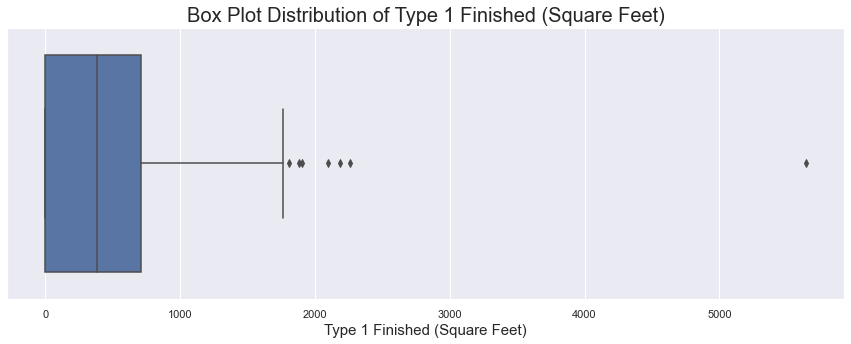

In [314]:
plot_box_plot_from_series(data=raw_data.BsmtFinSF1,
                          plot_title='Box Plot Distribution of Type 1 Finished (Square Feet)', 
                          x_axis_label='Type 1 Finished (Square Feet)')

### 3.35 Basement Finished Area Ratings (if multiple types)

In [315]:
raw_data.BsmtFinType2.isna().sum()

38

In [316]:
base_fin_2_df = raw_data.BsmtFinType2.value_counts(sort=False)
base_fin_2_df

Unf    1256
ALQ      19
GLQ      14
LwQ      46
BLQ      33
Rec      54
Name: BsmtFinType2, dtype: int64

In [317]:
raw_data.BsmtFinType2 = raw_data.BsmtFinType2.map({np.nan: 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})

In [318]:
raw_data.BsmtFinType2.value_counts(sort=False)

0      38
1    1256
2      46
3      54
4      33
5      19
6      14
Name: BsmtFinType2, dtype: int64

### 3.36 Type 2 Finished (Square feet)

In [319]:
raw_data.BsmtFinSF2.isna().sum()

0

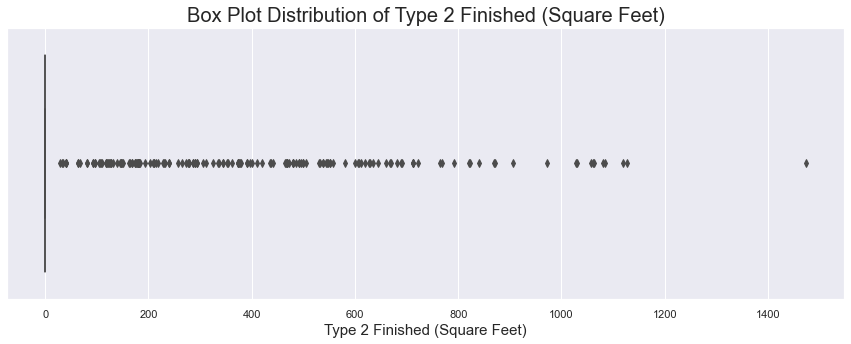

In [320]:
plot_box_plot_from_series(data=raw_data.BsmtFinSF2,
                          plot_title='Box Plot Distribution of Type 2 Finished (Square Feet)', 
                          x_axis_label='Type 2 Finished (Square Feet)')

### 3.37 Unfinished Square Feet of Basement Area

In [321]:
raw_data.BsmtUnfSF.isna().sum()

0

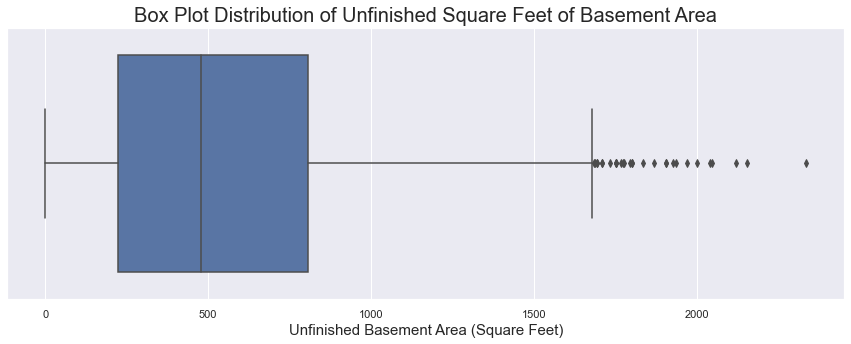

In [322]:
plot_box_plot_from_series(data=raw_data.BsmtUnfSF,
                          plot_title='Box Plot Distribution of Unfinished Square Feet of Basement Area', 
                          x_axis_label='Unfinished Basement Area (Square Feet)')

### 3.38 Total Square Feet of Basement Area

In [323]:
raw_data.TotalBsmtSF.isna().sum()

0

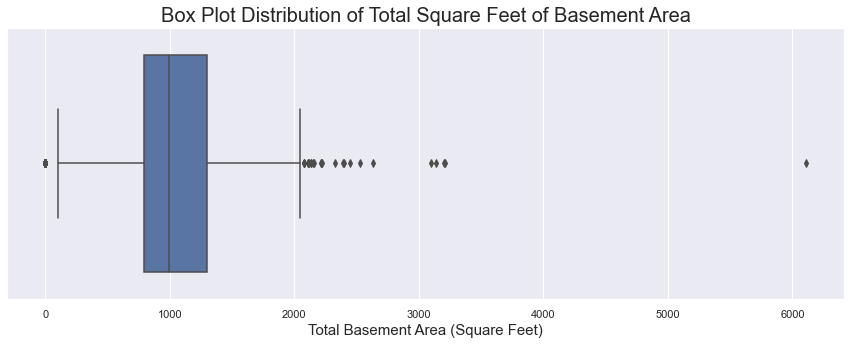

In [324]:
plot_box_plot_from_series(data=raw_data.TotalBsmtSF,
                          plot_title='Box Plot Distribution of Total Square Feet of Basement Area', 
                          x_axis_label='Total Basement Area (Square Feet)')

### 3.39 Heating Type

In [325]:
raw_data.Heating.isna().sum()

0

In [326]:
raw_data.Heating.value_counts(sort=False)

GasA     1428
Grav        7
OthW        2
GasW       18
Wall        4
Floor       1
Name: Heating, dtype: int64

### 3.40 Heating Quality & Condition

In [327]:
raw_data.HeatingQC.isna().sum()

0

In [328]:
heating_qc_df = raw_data.HeatingQC.value_counts(sort=False)
heating_qc_df

TA    428
Ex    741
Po      1
Fa     49
Gd    241
Name: HeatingQC, dtype: int64

In [329]:
raw_data.HeatingQC = raw_data.HeatingQC.map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})

In [330]:
raw_data.HeatingQC.value_counts(sort=False)

0      1
1     49
2    428
3    241
4    741
Name: HeatingQC, dtype: int64

### 3.41 Central AC

In [331]:
raw_data.CentralAir.isna().sum()

0

In [332]:
central_ac_df = raw_data.CentralAir.value_counts(sort=False)
central_ac_df

Y    1365
N      95
Name: CentralAir, dtype: int64

In [333]:
raw_data.CentralAir = raw_data.CentralAir.map({'N': 0, 'Y': 1})

In [334]:
raw_data.CentralAir.value_counts(sort=False)

0      95
1    1365
Name: CentralAir, dtype: int64

### 3.42 Electrical system

In [335]:
raw_data.Electrical.isna().sum()

1

In [336]:
electrical_df = raw_data.Electrical.value_counts(sort=False)
electrical_df

FuseF      27
FuseP       3
FuseA      94
Mix         1
SBrkr    1334
Name: Electrical, dtype: int64

#### Since there is only one value missing in the column, we will impute this missing value with the value which repeats maximum number of times in this column.
#### Because, we also see that mostly the items in this columns refers to "Standard Circuit Breakers & Romex". So we will replace this missing value with the same

In [337]:
raw_data.Electrical = raw_data.Electrical.replace([np.nan], 'SBrkr')

In [338]:
raw_data.Electrical.isna().sum()

0

#### Here we can conclude that there are no missin values present in the column

In [339]:
electrical_df = raw_data.Electrical.value_counts(sort=False)
electrical_df

FuseF      27
FuseP       3
FuseA      94
Mix         1
SBrkr    1335
Name: Electrical, dtype: int64

In [340]:
raw_data.Electrical = raw_data.Electrical.map({'Mix': 0, 'FuseP': 1, 'FuseF': 2, 'FuseA': 3, 'SBrkr': 4})

In [341]:
raw_data.Electrical.value_counts(sort=False)

0       1
1       3
2      27
3      94
4    1335
Name: Electrical, dtype: int64

### 3.43 First Floor (Square Feet)

In [342]:
raw_data['1stFlrSF'].isna().sum()

0

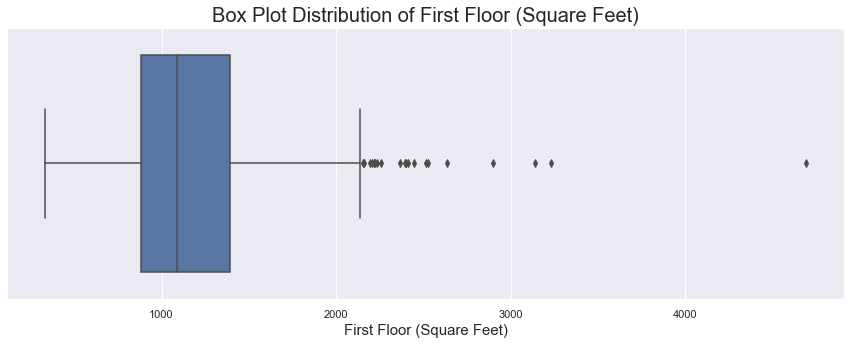

In [343]:
plot_box_plot_from_series(data=raw_data['1stFlrSF'],
                          plot_title='Box Plot Distribution of First Floor (Square Feet)', 
                          x_axis_label='First Floor (Square Feet)')

### 3.44 Second floor square feet

In [344]:
raw_data['2ndFlrSF'].isna().sum()

0

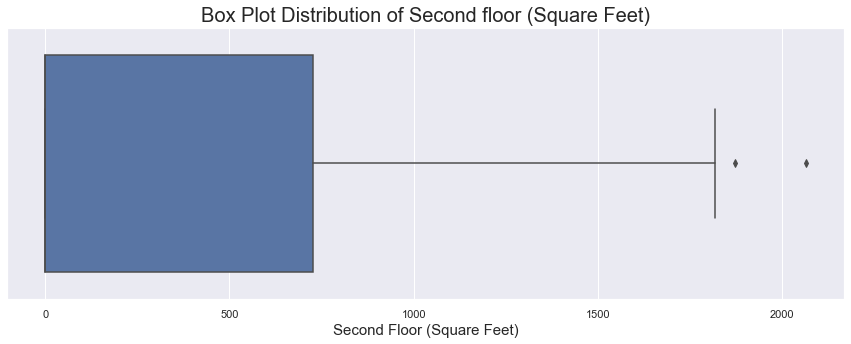

In [345]:
plot_box_plot_from_series(data=raw_data['2ndFlrSF'],
                          plot_title='Box Plot Distribution of Second floor (Square Feet)', 
                          x_axis_label='Second Floor (Square Feet)')

### 3.45 Low quality Finished square feet (all floors)

In [346]:
raw_data['LowQualFinSF'].isna().sum()

0

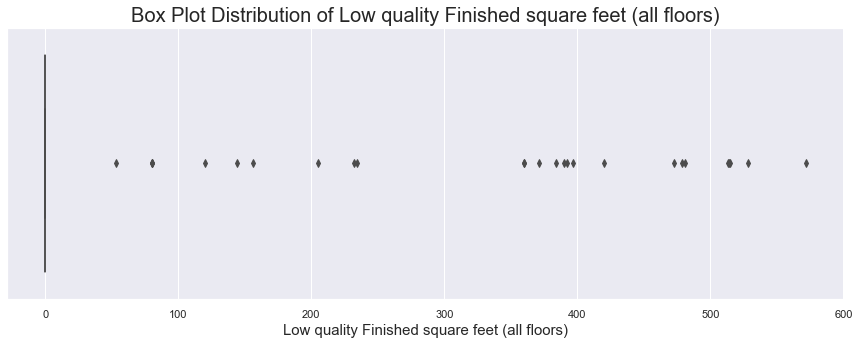

In [347]:
plot_box_plot_from_series(data=raw_data['LowQualFinSF'],
                          plot_title='Box Plot Distribution of Low quality Finished square feet (all floors)', 
                          x_axis_label='Low quality Finished square feet (all floors)')

### 3.46 Above grade (ground) living area square feet

In [348]:
raw_data.GrLivArea.isna().sum()

0

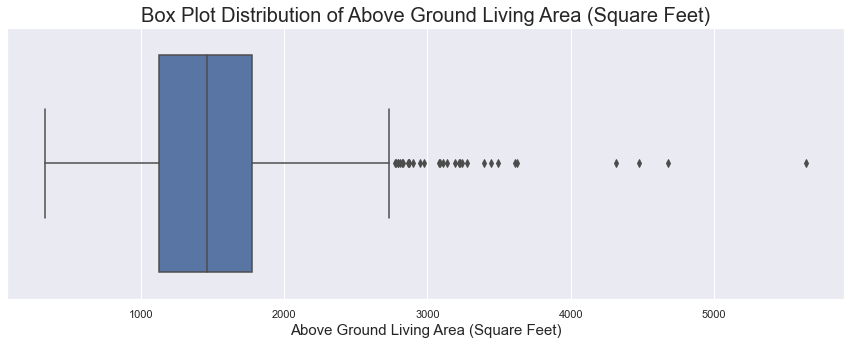

In [349]:
plot_box_plot_from_series(data=raw_data.GrLivArea,
                          plot_title='Box Plot Distribution of Above Ground Living Area (Square Feet)', 
                          x_axis_label='Above Ground Living Area (Square Feet)')

### 3.47 Basement full bathrooms

In [350]:
raw_data['BsmtFullBath'].isna().sum()

0

In [351]:
base_bath_full_df = raw_data.BsmtFullBath.value_counts(sort=False)
base_bath_full_df

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

### 3.48 Basement half bathrooms

In [352]:
raw_data.BsmtHalfBath.isna().sum()

0

In [353]:
base_bath_half_df = raw_data.BsmtHalfBath.value_counts(sort=False)
base_bath_half_df

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

### 3.49 Full bathrooms above grade

In [354]:
raw_data.FullBath.isna().sum()

0

In [355]:
full_bath_df = raw_data.FullBath.value_counts(sort=False)
full_bath_df

0      9
1    650
2    768
3     33
Name: FullBath, dtype: int64

### 3.50 Half baths above grade

In [356]:
raw_data.HalfBath.isna().sum()

0

In [357]:
half_bath_df = raw_data.HalfBath.value_counts(sort=False)
half_bath_df

0    913
1    535
2     12
Name: HalfBath, dtype: int64

### 3.51 Bedrooms above grade (does NOT include basement bedrooms)

In [358]:
raw_data.BedroomAbvGr.isna().sum()

0

In [359]:
bed_above_ground_df = raw_data.BedroomAbvGr.value_counts(sort=False)
bed_above_ground_df

0      6
1     50
2    358
3    804
4    213
5     21
6      7
8      1
Name: BedroomAbvGr, dtype: int64

### 3.52 Kitchens above grade

In [360]:
raw_data.KitchenAbvGr.isna().sum()

0

In [361]:
kit_above_ground_df = raw_data.KitchenAbvGr.value_counts(sort=False)
kit_above_ground_df

0       1
1    1392
2      65
3       2
Name: KitchenAbvGr, dtype: int64

### 3.53 Kitchen Quality

In [362]:
raw_data.KitchenQual.isna().sum()

0

In [363]:
kit_qual_df = raw_data.KitchenQual.value_counts(sort=False)
kit_qual_df

TA    735
Ex    100
Fa     39
Gd    586
Name: KitchenQual, dtype: int64

In [364]:
raw_data.KitchenQual = raw_data.KitchenQual.map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})

In [365]:
raw_data.KitchenQual.value_counts(sort=False)

1     39
2    735
3    586
4    100
Name: KitchenQual, dtype: int64

### 3.54 Total Rooms Above Ground

In [366]:
raw_data.TotRmsAbvGrd.isna().sum()

0

In [367]:
tot_room_abv_grnd_df = raw_data.TotRmsAbvGrd.value_counts(sort=False)
tot_room_abv_grnd_df

2       1
3      17
4      97
5     275
6     402
7     329
8     187
9      75
10     47
11     18
12     11
14      1
Name: TotRmsAbvGrd, dtype: int64

### 3.55 Home Functionality

In [368]:
raw_data.Functional.isna().sum()

0

In [369]:
func_df = raw_data.Functional.value_counts(sort=False)
func_df

Maj1      14
Sev        1
Typ     1360
Min2      34
Mod       15
Min1      31
Maj2       5
Name: Functional, dtype: int64

In [370]:
raw_data.Functional = raw_data.Functional.map({'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6,
                                                 'Typ': 7})

In [371]:
raw_data.Functional.value_counts(sort=False)

1       1
2       5
3      14
4      15
5      34
6      31
7    1360
Name: Functional, dtype: int64

### 3.56 Fireplaces

In [372]:
raw_data.Fireplaces.isna().sum()

0

In [373]:
fireplaces_df = raw_data.Fireplaces.value_counts(sort=False)
fireplaces_df

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

### 3.57 Fireplaces Quality

In [374]:
raw_data.FireplaceQu.isna().sum()

690

In [375]:
fireplace_qual_df = raw_data.FireplaceQu.value_counts(sort=False)
fireplace_qual_df

TA    313
Ex     24
Po     20
Fa     33
Gd    380
Name: FireplaceQu, dtype: int64

#### None values are imputed as 0, because data dictionary states that null value corresponds to 0 in this case

In [376]:
raw_data.FireplaceQu = raw_data.FireplaceQu.map({np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

In [377]:
raw_data.FireplaceQu.value_counts(sort=False)

0    690
1     20
2     33
3    313
4    380
5     24
Name: FireplaceQu, dtype: int64

### 3.58 Garage Type

In [378]:
raw_data.GarageType.isna().sum()

81

In [379]:
gar_type_df = raw_data.GarageType.value_counts(sort=False)
gar_type_df

Attchd     870
BuiltIn     88
2Types       6
Detchd     387
Basment     19
CarPort      9
Name: GarageType, dtype: int64

#### None values are imputed as 0, because data dictionary states that null value corresponds to 0 in this case

In [380]:
raw_data.GarageType = raw_data.GarageType.map({np.nan: 0, 'Detchd': 1, 'CarPort': 2, 'BuiltIn': 3, 'Basment': 4, 'Attchd': 5, '2Types': 6})

In [381]:
raw_data.GarageType.value_counts(sort=False)

0     81
1    387
2      9
3     88
4     19
5    870
6      6
Name: GarageType, dtype: int64

### 3.59 Garage Built

In [382]:
raw_data.GarageYrBlt.isna().sum()

81

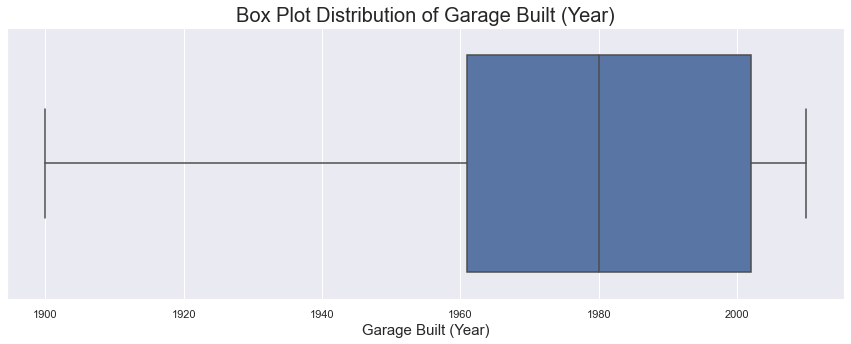

In [383]:
plot_box_plot_from_series(data=raw_data[~raw_data.GarageYrBlt.isna()].GarageYrBlt,
                          plot_title='Box Plot Distribution of Garage Built (Year)', 
                          x_axis_label='Garage Built (Year)')

## Check if the garage year actually has to be 1900

### 3.60 Garage Finish

In [384]:
raw_data.GarageFinish.isna().sum()

81

In [385]:
gar_fin_df = raw_data.GarageFinish.value_counts(sort=False)
gar_fin_df

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [386]:
raw_data.GarageFinish = raw_data.GarageFinish.map({np.nan: 0, 'Unf': 1, 'RFn': 2, 'Fin': 3})

In [387]:
raw_data.GarageFinish.value_counts(sort=False)

0     81
1    605
2    422
3    352
Name: GarageFinish, dtype: int64

### 3.61 Garage Cars

In [388]:
raw_data.GarageCars.isna().sum()

0

In [389]:
raw_data.GarageCars.value_counts(sort=False)

0     81
1    369
2    824
3    181
4      5
Name: GarageCars, dtype: int64

### 3.62 Garage Area

In [390]:
raw_data.GarageArea.isna().sum()

0

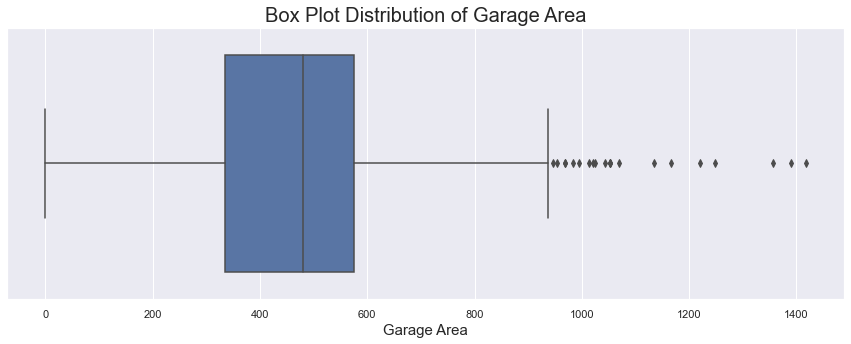

In [391]:
plot_box_plot_from_series(data=raw_data.GarageArea,
                          plot_title='Box Plot Distribution of Garage Area', 
                          x_axis_label='Garage Area')

### 3.63 Garage Quality

In [392]:
raw_data.GarageQual.isna().sum()

81

In [393]:
gar_qual_df = raw_data.GarageQual.value_counts(sort=False)
gar_qual_df

TA    1311
Ex       3
Po       3
Fa      48
Gd      14
Name: GarageQual, dtype: int64

In [394]:
raw_data.GarageQual = raw_data.GarageQual.map({np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

In [395]:
raw_data.GarageQual.value_counts(sort=False)

0      81
1       3
2      48
3    1311
4      14
5       3
Name: GarageQual, dtype: int64

### 3.64 Garage Condition

In [396]:
raw_data.GarageCond.isna().sum()

81

In [397]:
gar_cond_df = raw_data.GarageCond.value_counts(sort=False)
gar_cond_df

TA    1326
Ex       2
Po       7
Fa      35
Gd       9
Name: GarageCond, dtype: int64

In [398]:
raw_data.GarageCond = raw_data.GarageCond.map({np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

In [399]:
raw_data.GarageCond.value_counts(sort=False)

0      81
1       7
2      35
3    1326
4       9
5       2
Name: GarageCond, dtype: int64

### 3.65 Paved Driveway

In [400]:
raw_data.PavedDrive.isna().sum()

0

In [401]:
pave_drive_df = raw_data.PavedDrive.value_counts(sort=False)
pave_drive_df

Y    1340
P      30
N      90
Name: PavedDrive, dtype: int64

In [402]:
raw_data.PavedDrive = raw_data.PavedDrive.map({'N': 0, 'P': 1, 'Y': 2})

In [403]:
raw_data.PavedDrive.value_counts(sort=False)

0      90
1      30
2    1340
Name: PavedDrive, dtype: int64

### 3.66 Wood Deck Area (Square Feet)

In [404]:
raw_data.WoodDeckSF.isna().sum()

0

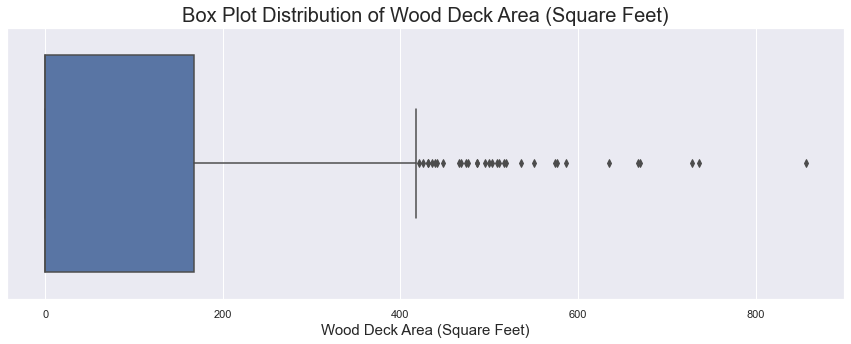

In [405]:
plot_box_plot_from_series(data=raw_data.WoodDeckSF,
                          plot_title='Box Plot Distribution of Wood Deck Area (Square Feet)', 
                          x_axis_label='Wood Deck Area (Square Feet)')

### 3.67 Open Porch Area (Square Feet)

In [406]:
raw_data.OpenPorchSF.isna().sum()

0

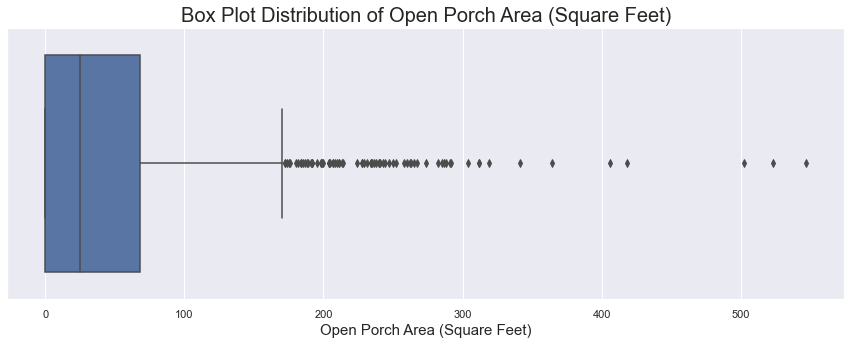

In [407]:
plot_box_plot_from_series(data=raw_data.OpenPorchSF,
                          plot_title='Box Plot Distribution of Open Porch Area (Square Feet)', 
                          x_axis_label='Open Porch Area (Square Feet)')

### 3.68 Open Porch Area (Square Feet)

In [408]:
raw_data.EnclosedPorch.isna().sum()

0

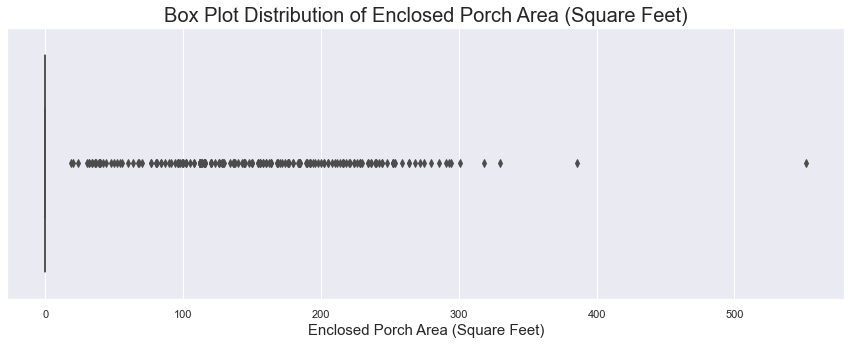

In [409]:
plot_box_plot_from_series(data=raw_data.EnclosedPorch,
                          plot_title='Box Plot Distribution of Enclosed Porch Area (Square Feet)', 
                          x_axis_label='Enclosed Porch Area (Square Feet)')

### 3.69 3 Season Porch Area (Square Feet)

In [410]:
raw_data['3SsnPorch'].isna().sum()

0

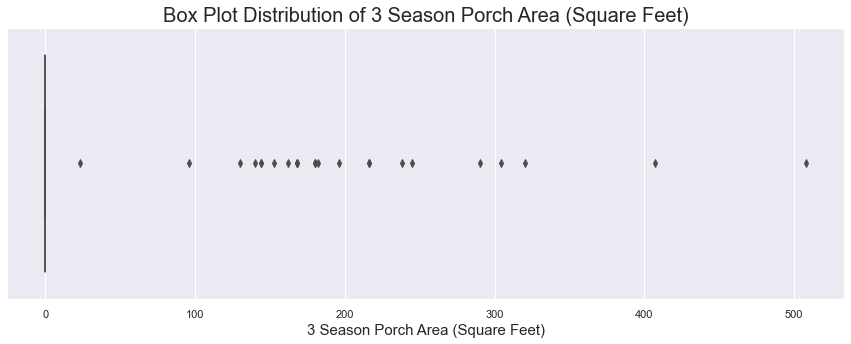

In [411]:
plot_box_plot_from_series(data=raw_data['3SsnPorch'],
                          plot_title='Box Plot Distribution of 3 Season Porch Area (Square Feet)', 
                          x_axis_label='3 Season Porch Area (Square Feet)')

### 3.70 Screen Porch Area (Square Feet)

In [412]:
raw_data.ScreenPorch.isna().sum()

0

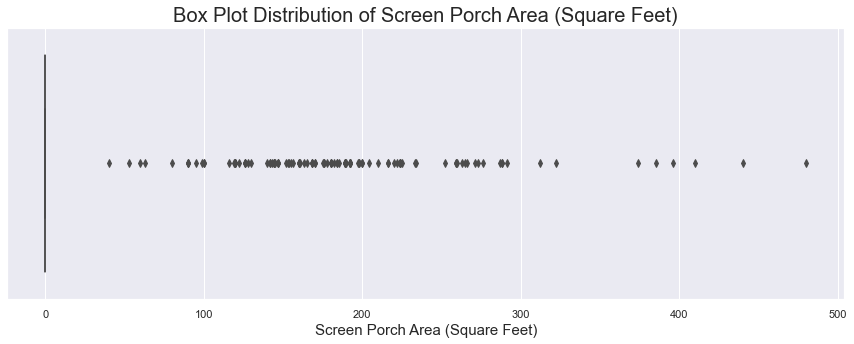

In [413]:
plot_box_plot_from_series(data=raw_data.ScreenPorch,
                          plot_title='Box Plot Distribution of Screen Porch Area (Square Feet)', 
                          x_axis_label='Screen Porch Area (Square Feet)')

### 3.71 Pool Area (Square Feet)

In [414]:
raw_data.PoolArea.isna().sum()

0

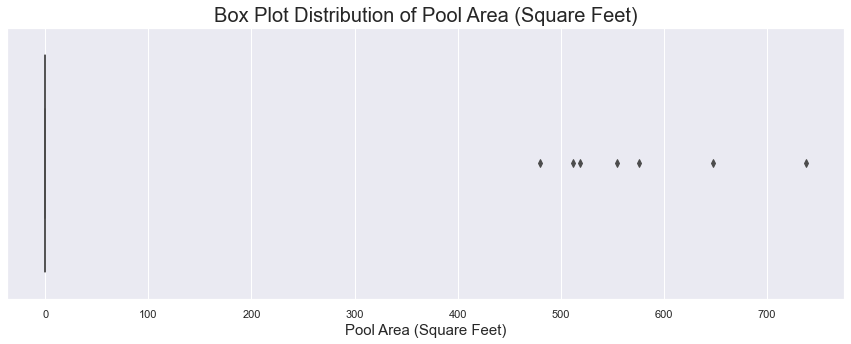

In [415]:
plot_box_plot_from_series(data=raw_data.PoolArea,
                          plot_title='Box Plot Distribution of Pool Area (Square Feet)', 
                          x_axis_label='Pool Area (Square Feet)')

### 3.72 Pool Quality

In [416]:
raw_data.PoolQC.isna().sum()

1453

In [417]:
pool_qual_df = raw_data.PoolQC.value_counts(sort=False)
pool_qual_df

Ex    2
Fa    2
Gd    3
Name: PoolQC, dtype: int64

In [418]:
raw_data.PoolQC = raw_data.PoolQC.map({np.nan: 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})

In [419]:
raw_data.PoolQC.value_counts(sort=False)

0    1453
1       2
3       3
4       2
Name: PoolQC, dtype: int64

### 3.73 Fence Quality

In [420]:
raw_data.Fence.isna().sum()

1179

In [421]:
fence_df = raw_data.Fence.value_counts(sort=False)
fence_df

GdPrv     59
MnPrv    157
MnWw      11
GdWo      54
Name: Fence, dtype: int64

In [422]:
raw_data.Fence = raw_data.Fence.map({np.nan: 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4})

In [423]:
raw_data.Fence.value_counts(sort=False)

0    1179
1      11
2      54
3     157
4      59
Name: Fence, dtype: int64

### 3.74 Miscellaneous Features

In [424]:
raw_data.MiscFeature.isna().sum()

1406

In [425]:
misc_df = raw_data.MiscFeature.value_counts(sort=False)
misc_df

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

### 3.75 Miscellaneous Features Value

In [426]:
raw_data.MiscVal.isna().sum()

0

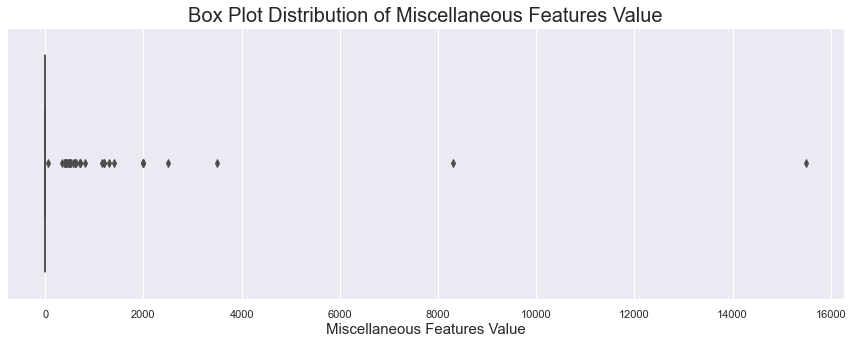

In [427]:
plot_box_plot_from_series(data=raw_data.MiscVal,
                          plot_title='Box Plot Distribution of Miscellaneous Features Value', 
                          x_axis_label='Miscellaneous Features Value')

### 3.76 Months & Years Old

In [428]:
raw_data.MoSold.head(5)

0     2
1     5
2     9
3     2
4    12
Name: MoSold, dtype: int64

In [429]:
raw_data.YrSold.head(5)

0    2008
1    2007
2    2008
3    2006
4    2008
Name: YrSold, dtype: int64

In [430]:
raw_data['MonthsOld'] = (datetime.now() - pd.to_datetime(raw_data.YrSold.astype(str) + '/' + raw_data.MoSold.astype(str))) //np.timedelta64(1,'M') 

### 3.77 Sale Type

In [431]:
raw_data.SaleType.isna().sum()

0

In [432]:
sale_type_df = raw_data.SaleType.value_counts(sort=False)
sale_type_df

ConLI       5
COD        43
Oth         3
ConLD       9
New       122
ConLw       5
WD       1267
Con         2
CWD         4
Name: SaleType, dtype: int64

### 3.78 Sale Condition

In [433]:
raw_data.SaleCondition.isna().sum()

0

In [434]:
sale_cond_df = raw_data.SaleCondition.value_counts(sort=False)
sale_cond_df

Alloca       12
Normal     1198
AdjLand       4
Partial     125
Abnorml     101
Family       20
Name: SaleCondition, dtype: int64

### 3.79 Sale Price

In [435]:
raw_data.SalePrice.isna().sum()

0

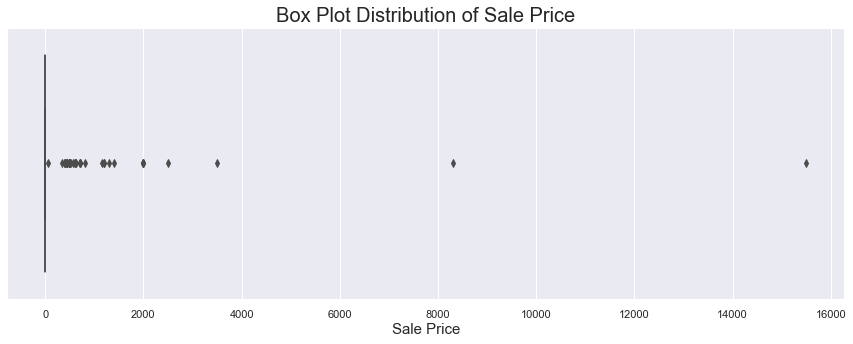

In [436]:
plot_box_plot_from_series(data=raw_data.MiscVal,
                          plot_title='Box Plot Distribution of Sale Price', 
                          x_axis_label='Sale Price')